# RSQ & RMQ
https://contest.yandex.ru/contest/44534/enter/

## RMQ

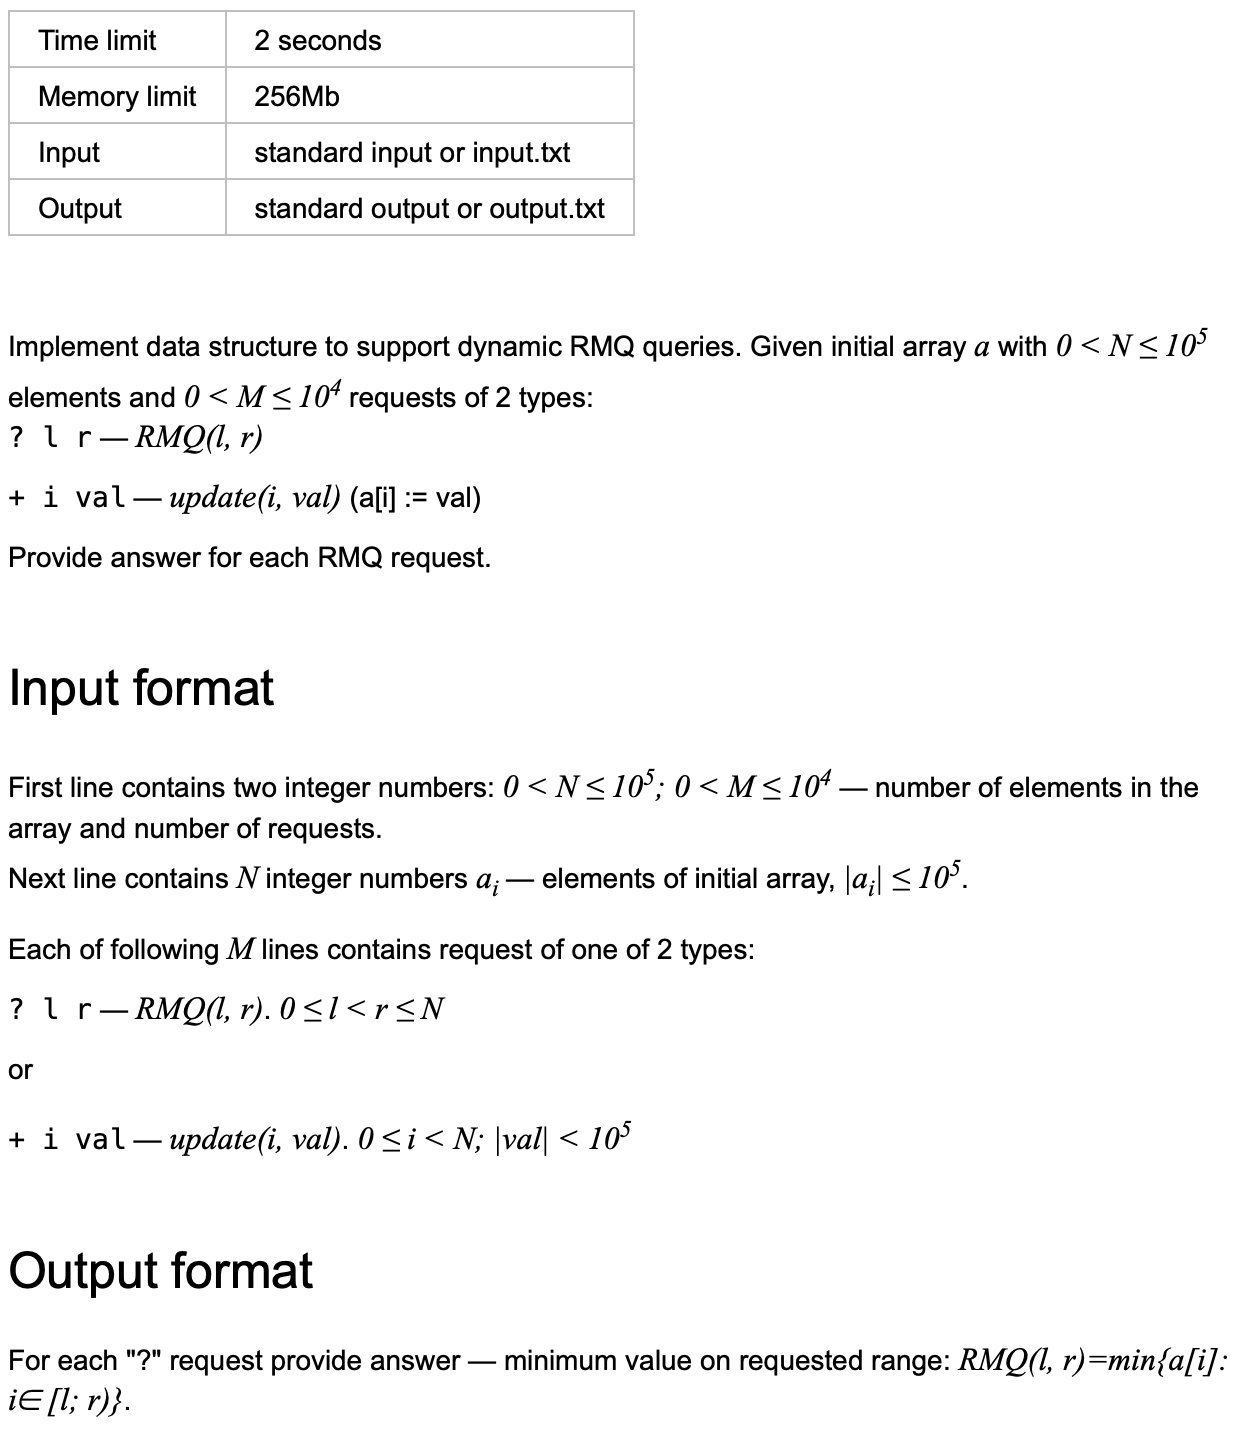

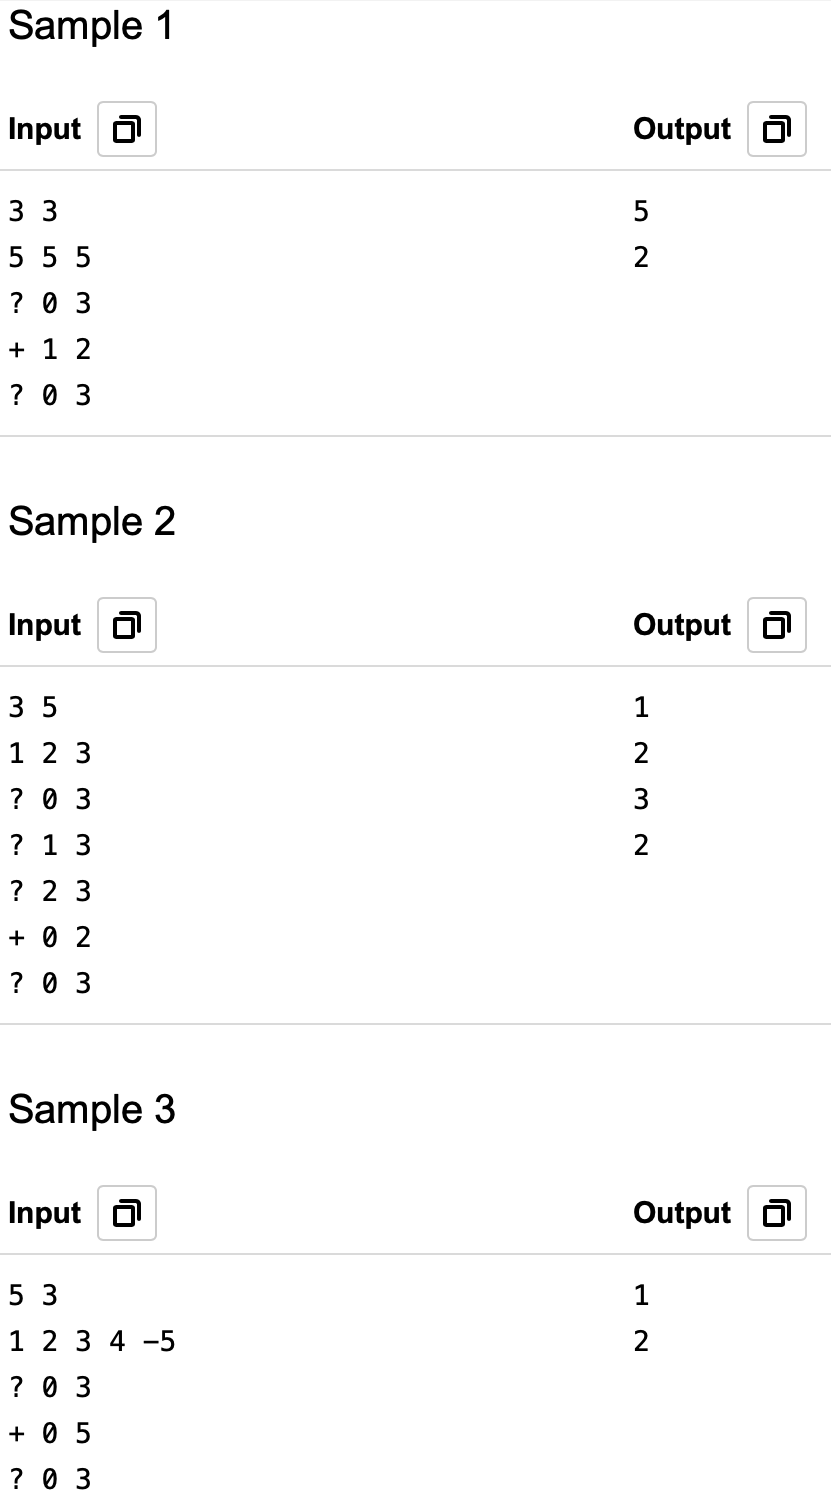

In [ ]:
from math import ceil, log2


class RMQSegmentTree:
    neutral_value = 1e5

    def __init__(self, a):
        self.N = 2 ** int(ceil(log2(len(a))))
        self.s = [None] * (self.N - 1) + list(a) + ([self.neutral_value] * (self.N - len(a)))
        for i in range(self.N - 2, -1, -1):
            self.refresh_s(i)

    def refresh_s(self, i):
        self.s[i] = min(self.s[2 * i + 1], self.s[2 * i + 2])

    def rsq_i(self, l, r, i, li, ri):
        if (r <= li) or (ri <= l):
            return self.neutral_value
        if (l <= li) and (ri <= r):
            return self.s[i]
        middle = li + (ri - li) // 2
        return (min(self.rsq_i(l, r, i * 2 + 1, li, middle),
                    self.rsq_i(l, r, i * 2 + 2, middle, ri)))

    def update(self, i, v):
        i += self.N - 1
        self.s[i] = v
        while i > 0:
            i = (i - 1) // 2
            self.refresh_s(i)

    def rmq(self, l, r):
        return self.rsq_i(l, r, 0, 0, self.N)


n, m = map(int, input().split())
inp = list(map(int, input().split()))
rt = RMQSegmentTree(inp)
for i in range(m):
    command, l, r = input().split()
    l = int(l)
    r = int(r)
    if command == '+':
        rt.update(l, r)
    elif command == '?':
        print(rt.rmq(l, r))


## RZQ

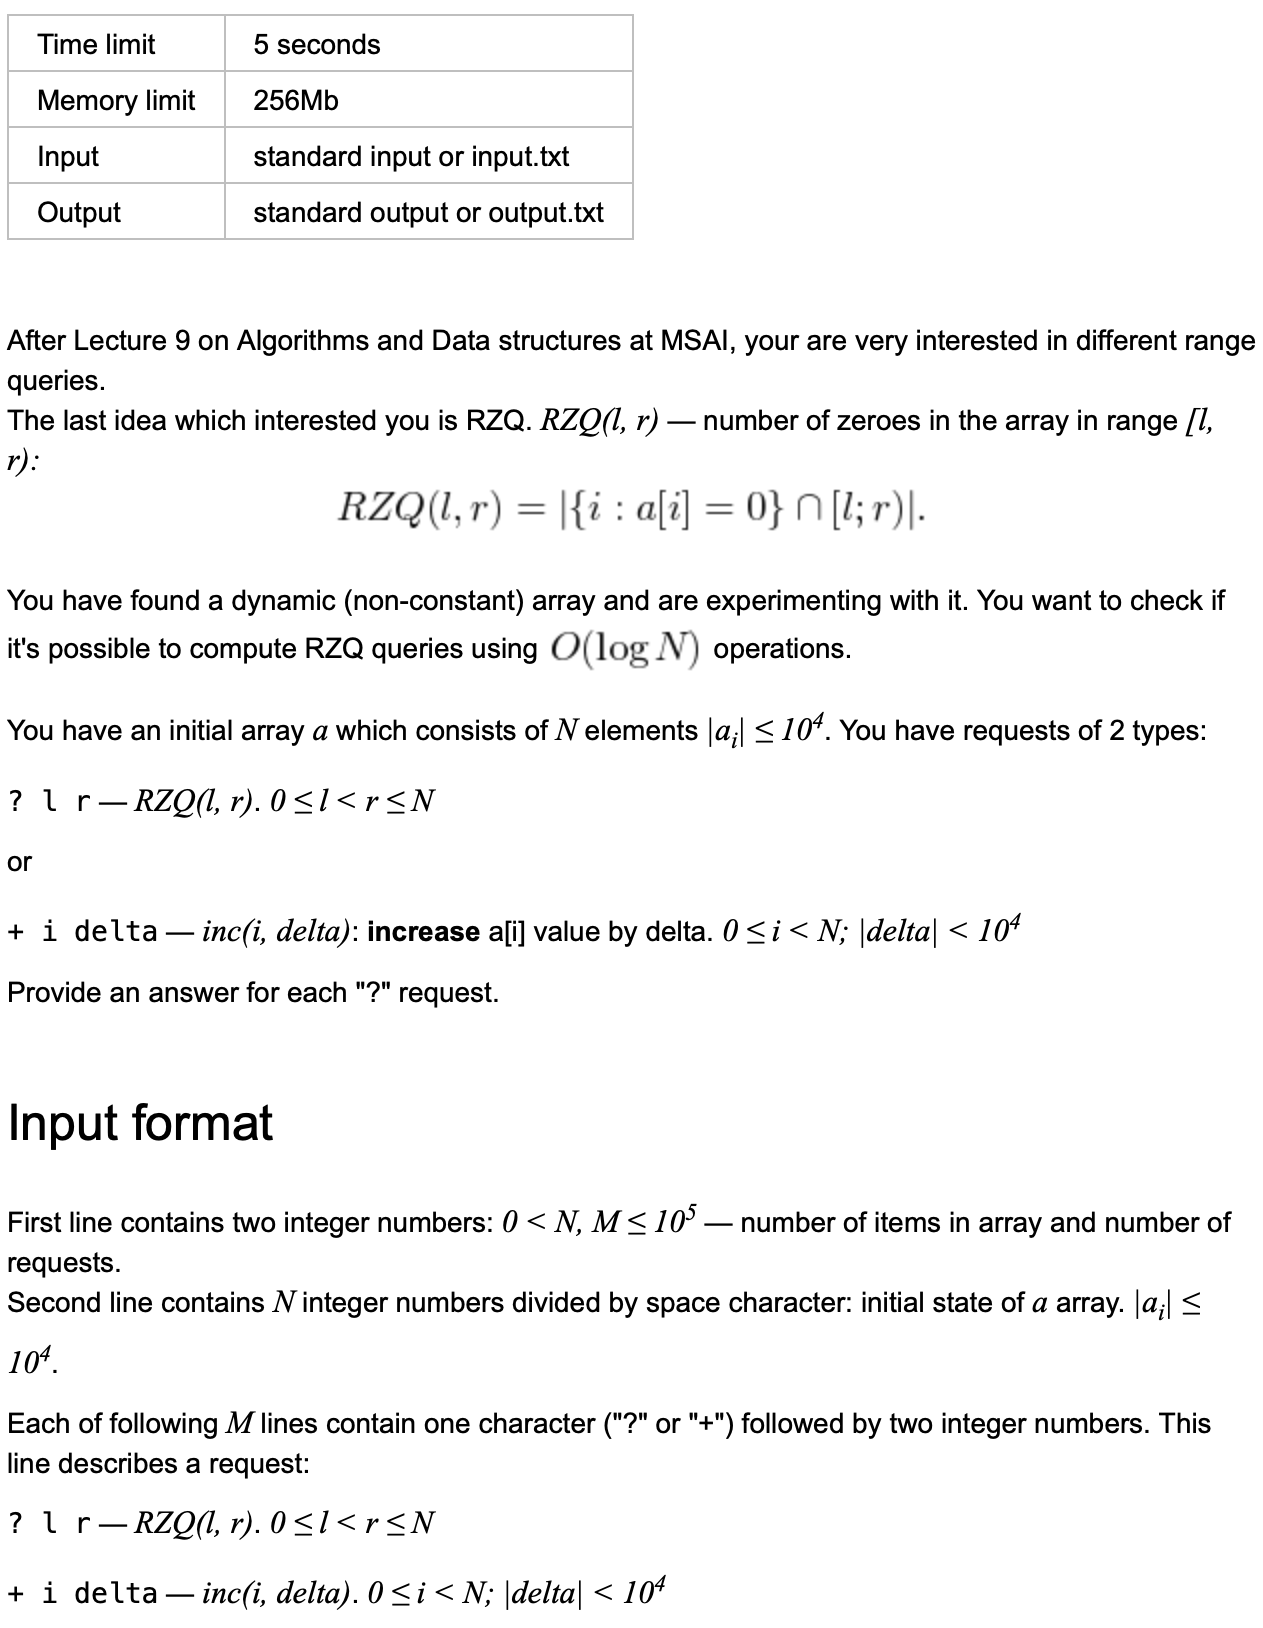

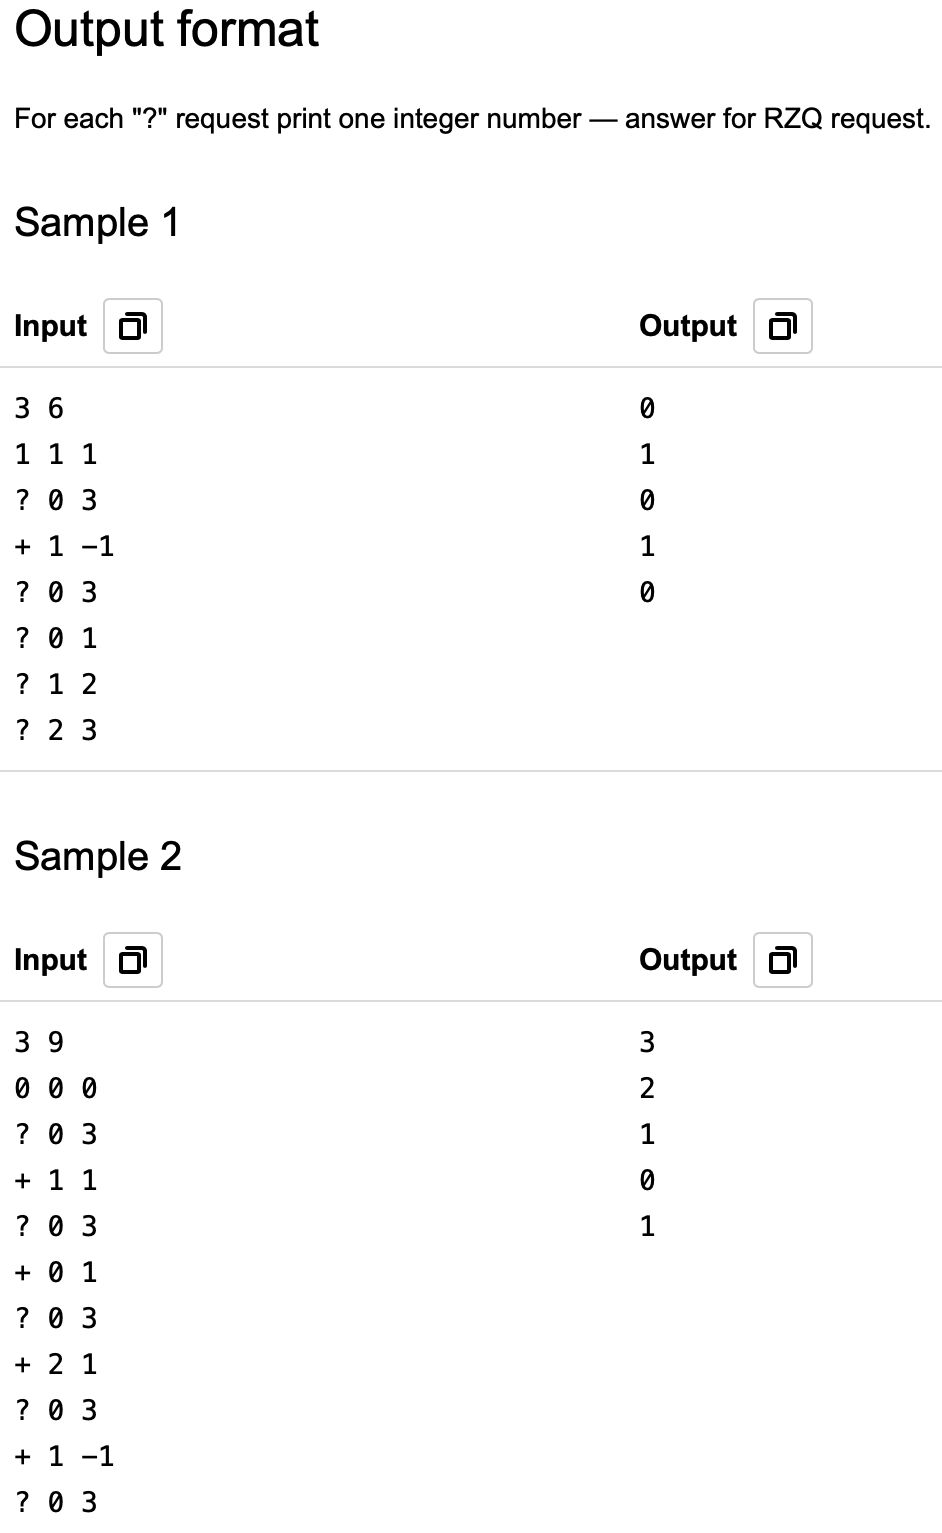

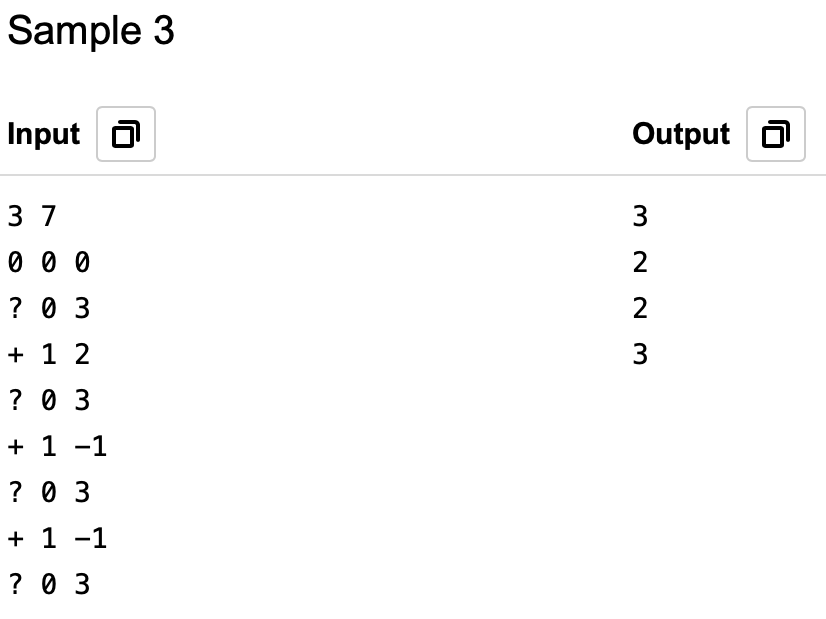

In [ ]:
from math import ceil, log2


class RSQSegmentTree:
    neutral_value = 0

    def __init__(self, a):
        self.N = 2 ** int(ceil(log2(len(a))))
        self.orig_arr = a
        a_z = []
        for val in a:
            if val == 0:
                a_z.append(1)
            else:
                a_z.append(0)
        self.s = [None] * (self.N - 1) + a_z + ([self.neutral_value] * (self.N - len(a)))
        for i in range(self.N - 2, -1, -1):
            self.refresh_s(i)

    def refresh_s(self, i):
        self.s[i] = self.s[2 * i + 1] + self.s[2 * i + 2]

    def rsq_i(self, l, r, i, li, ri):
        if (r <= li) or (ri <= l):
            return self.neutral_value
        if (l <= li) and (ri <= r):
            return self.s[i]
        middle = li + (ri - li) // 2
        return (self.rsq_i(l, r, i * 2 + 1, li, middle) + self.rsq_i(l, r, i * 2 + 2, middle, ri))

    def update(self, i, delta):
        old_val = self.orig_arr[i]
        self.orig_arr[i] += delta
        new_val = 0
        i += self.N - 1
        if old_val + delta == 0:
            new_val = 1
        self.s[i] = new_val
        while i > 0:
            i = (i - 1) // 2
            self.refresh_s(i)

    def rsq(self, l, r):
        return self.rsq_i(l, r, 0, 0, self.N)


n, m = map(int, input().split())
inp = list(map(int, input().split()))
rt = RSQSegmentTree(inp)
for i in range(m):
    command, l, r = input().split()
    l = int(l)
    r = int(r)
    if command == '+':
        rt.update(l, r)
    elif command == '?':
        print(rt.rsq(l, r))
